In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kabob_cleaned.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

              name                                 address   latitude  \
0       Star Kabob            Fair Oaks Mall J133, Fairfax  38.862289   
1       City Kabob                   9998 Main St, Fairfax  38.844482   
2    Ashburn Kabob  42882 Truro Parish Dr STE 101, Ashburn  39.018817   
3      Tasty Kabob                    1624 Boro Pl, Tysons  38.924783   
4  Arlington Kabob          5046 Langston Blvd., Arlington  38.896153   

   longitude  rating  user_ratings_total           type state  
0 -77.357984     4.7                 409  Mediterranean    VA  
1 -77.291313     4.2                  89         Afghan    VA  
2 -77.519205     4.5                 564  Mediterranean    VA  
3 -77.234004     4.6                 660         Afghan    VA  
4 -77.130949     4.7                 765         Afghan    VA  


In [3]:
# Descriptive statistics
num_restaurants = len(df)
avg_rating = df['rating'].mean()
total_user_ratings = df['user_ratings_total'].sum()
rating_distribution = df['rating'].value_counts().sort_index()

# Print the descriptive statistics
print(f"Number of Kabob Restaurants: {num_restaurants}")
print(f"Average Rating: {avg_rating:.2f}")
print(f"Total User Ratings: {total_user_ratings}")
print("Rating Distribution:")
print(rating_distribution)

Number of Kabob Restaurants: 117
Average Rating: 4.25
Total User Ratings: 55785
Rating Distribution:
rating
0.0     1
3.4     2
3.5     1
3.6     1
3.7     1
3.8     3
3.9     9
4.0     8
4.1    11
4.2    17
4.3    14
4.4    15
4.5     9
4.6    11
4.7     8
4.8     3
4.9     1
5.0     2
Name: count, dtype: int64


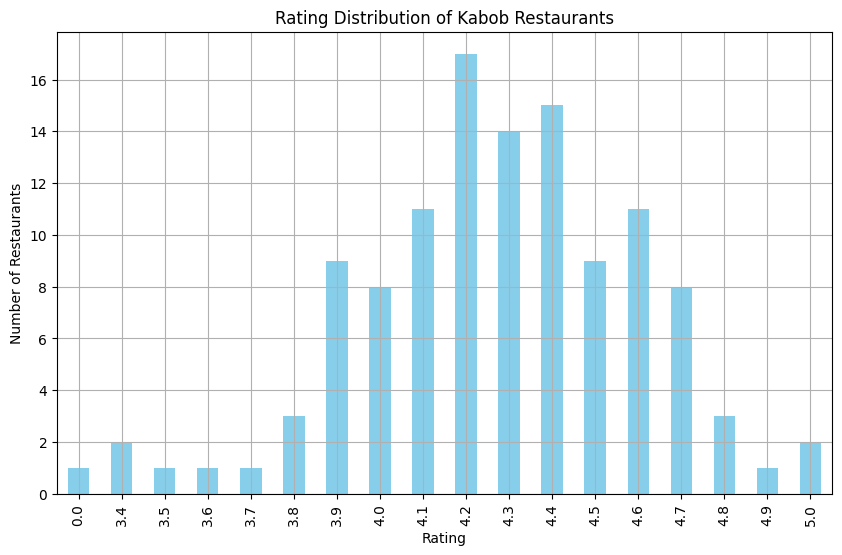

In [5]:
import matplotlib.pyplot as plt

# Plotting the rating distribution
plt.figure(figsize=(10, 6))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Rating Distribution of Kabob Restaurants')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()

Type Distribution:
type
Afghan            46
Desi              28
Persian           26
Mediterranean     10
Middle Eastern     7
Name: count, dtype: int64


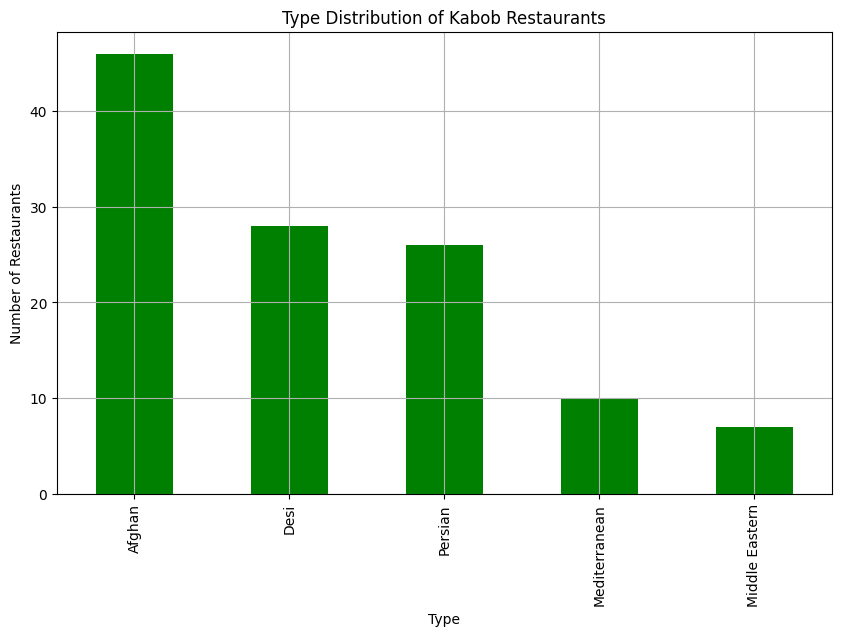

In [4]:
# Distribution by type
type_distribution = df['type'].value_counts()
print("Type Distribution:")
print(type_distribution)

# Plotting the type distribution
plt.figure(figsize=(10, 6))
type_distribution.plot(kind='bar', color='green')
plt.title('Type Distribution of Kabob Restaurants')
plt.xlabel('Type')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()

State Distribution:
state
VA    71
MD    37
DC     9
Name: count, dtype: int64


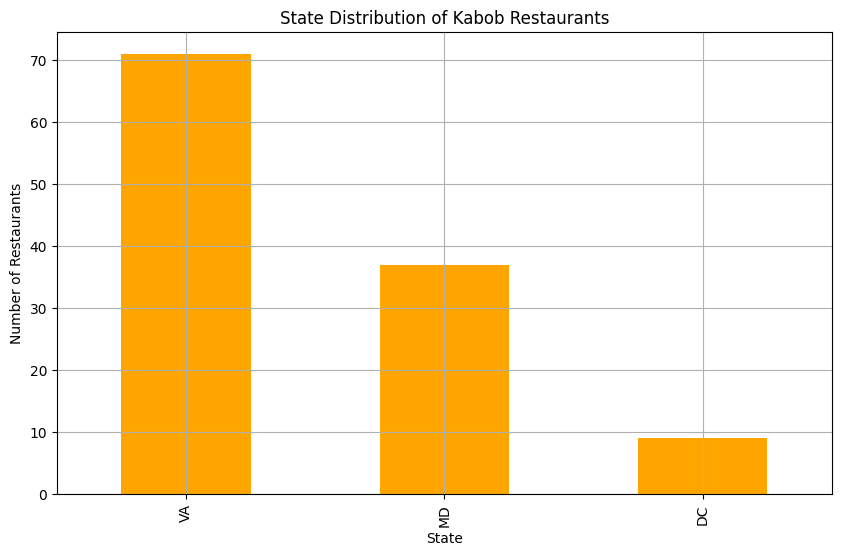

In [6]:
# State-wise analysis
state_distribution = df['state'].value_counts()
print("State Distribution:")
print(state_distribution)

# Plotting the state distribution
plt.figure(figsize=(10, 6))
state_distribution.plot(kind='bar', color='orange')
plt.title('State Distribution of Kabob Restaurants')
plt.xlabel('State')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()

Top Rated Restaurants:
                                 name  rating
103          Moby Dick House of Kabob     5.0
82                    The Kabob Joint     5.0
16                        Grill Kabob     4.9
11                      Fairfax Kabob     4.8
5                         Grill Kabob     4.8
87                           Kabob BQ     4.8
0                          Star Kabob     4.7
94   Aladdin House of Kabob and Gyros     4.7
19                        Grill Kabob     4.7
55                      Maiwand Kabob     4.7
Most Reviewed Restaurants:
                            name  user_ratings_total
20                  Kabob Palace                5295
78              Ravi Kabob House                1700
22                 Maiwand Kabob                1290
75                Kabob N Karahi                1283
59                   Shahi Kabob                1068
28                Charcoal Kabob                1027
95            Royal Palace Kabob                 988
61   Yummy Kabob & H

In [8]:
# Select only the name, latitude, and longitude columns
df_selected = df[['name', 'latitude', 'longitude']]

# Save the selected columns to a new CSV file
df_selected.to_csv('kabob_cleaned_selected.csv', index=False)

# Display the first few rows of the selected dataframe
print(df_selected.head())

              name   latitude  longitude
0       Star Kabob  38.862289 -77.357984
1       City Kabob  38.844482 -77.291313
2    Ashburn Kabob  39.018817 -77.519205
3      Tasty Kabob  38.924783 -77.234004
4  Arlington Kabob  38.896153 -77.130949


In [9]:
# Select only the name and type columns
df_name_type = df[['name', 'type']]

# Save the selected columns to a new CSV file
df_name_type.to_csv('kabob_cleaned_name_type.csv', index=False)

# Display the first few rows of the selected dataframe
print(df_name_type.head())

              name           type
0       Star Kabob  Mediterranean
1       City Kabob         Afghan
2    Ashburn Kabob  Mediterranean
3      Tasty Kabob         Afghan
4  Arlington Kabob         Afghan


In [10]:
# Count the frequency of each type
type_frequency = df['type'].value_counts().reset_index()
type_frequency.columns = ['type', 'count']

# Save the frequency data to a new CSV file
type_frequency.to_csv('kabob_type_frequency.csv', index=False)

# Display the frequency data
print(type_frequency)

             type  count
0          Afghan     46
1            Desi     28
2         Persian     26
3   Mediterranean     10
4  Middle Eastern      7


In [11]:
# Count the frequency of restaurants by state
state_frequency = df['state'].value_counts().reset_index()
state_frequency.columns = ['state', 'count']

# Save the frequency data to a new CSV file
state_frequency.to_csv('kabob_state_frequency.csv', index=False)

# Display the frequency data
print(state_frequency)

  state  count
0    VA     71
1    MD     37
2    DC      9


In [12]:
pip install pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install folium


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import folium

# Create a map centered around a central point (e.g., Washington, DC)
m = folium.Map(location=[38.89511, -77.03637], zoom_start=10)

# Add points to the map with smaller markers
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # smaller pointer
        popup=f"{row['name']} ({row['type']})",
        tooltip=row['name'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Save the map as an HTML file
m.save('kabob_restaurants_map.html')

# Display the map inline (if using Jupyter Notebook)
m